<a href="https://colab.research.google.com/github/yuziahaque/-Cat-vs-Dog-Image-Classification/blob/main/cat_dog_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
#generators (divides your complete data into batches)
train_ds= keras.utils.image_dataset_from_directory(
    directory='/content/dogs_vs_cats/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)
validation_ds= keras.utils.image_dataset_from_directory(
    directory='/content/dogs_vs_cats/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#normalize (pixel values 0-1)
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
#CNN Models
#(3 convolutional layers ---->> 1 layer -> 32 filters , 2 layer -> 64 , 3 layer -> 128 )

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
run=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 69s 105ms/step - loss: 1.3100 - accuracy: 0.5893 - val_loss: 0.6041 - val_accuracy: 0.6772
Epoch 2/10
625/625 [==============================] - 66s 105ms/step - loss: 0.5759 - accuracy: 0.7016 - val_loss: 0.5218 - val_accuracy: 0.7500
Epoch 3/10
625/625 [==============================] - 66s 106ms/step - loss: 0.5177 - accuracy: 0.7502 - val_loss: 0.5189 - val_accuracy: 0.7578
Epoch 4/10
625/625 [==============================] - 64s 101ms/step - loss: 0.4322 - accuracy: 0.8018 - val_loss: 0.7037 - val_accuracy: 0.6306
Epoch 5/10
625/625 [==============================] - 67s 106ms/step - loss: 0.3749 - accuracy: 0.8335 - val_loss: 0.5082 - val_accuracy: 0.7694
Epoch 6/10
625/625 [==============================] - 64s 102ms/step - loss: 0.3019 - accuracy: 0.8694 - val_loss: 0.4378 - val_accuracy: 0.8140
Epoch 7/10
625/625 [==============================] - 63s 101ms/step - loss: 0.2210 - accuracy: 0.9079 - val_loss: 0.6848 - val_ac

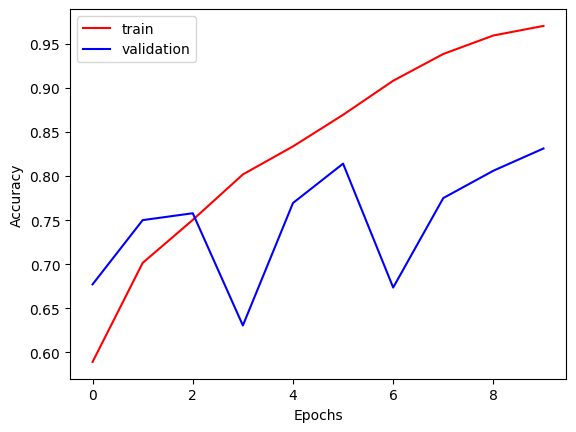

In [ ]:

import matplotlib.pyplot as plt

plt.plot(run.history['accuracy'], color='red', label='train')
plt.plot(run.history['val_accuracy'], color='blue', label='validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


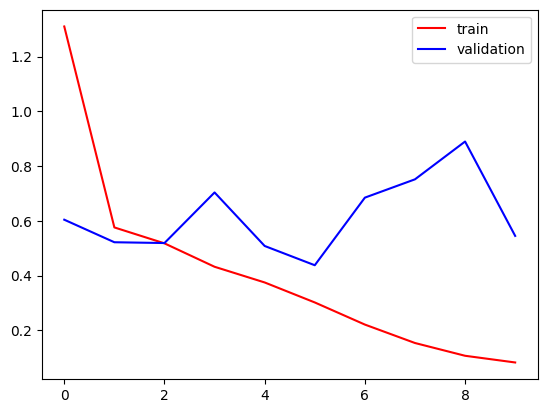

In [ ]:
plt.plot(run.history['loss'],color='red',label='train')
plt.plot(run.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
dog_img=cv2.imread('/content/dog.jpg')

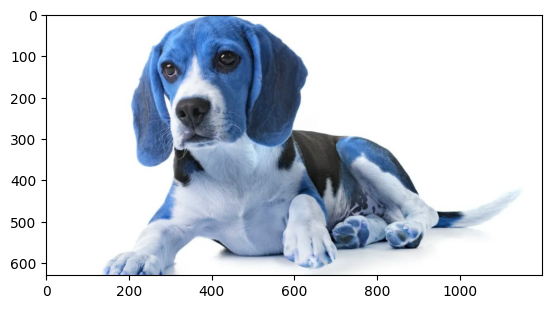

In [ ]:
plt.imshow(dog_img)

In [ ]:
dog_img.shape

(630, 1200, 3)

In [ ]:
dog_img = cv2.resize(dog_img,(256,256))

In [ ]:
test_input = dog_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 19ms/step


array([[1.]], dtype=float32)

In [ ]:
cat_img=cv2.imread('/content/Cat.jpg')

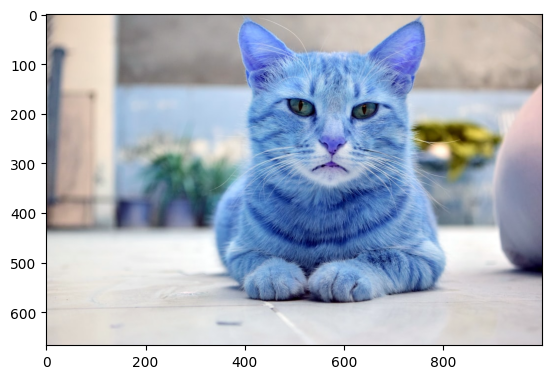

In [ ]:
plt.imshow(cat_img)

In [ ]:
cat_img.shape

(667, 1000, 3)

In [ ]:
cat_img = cv2.resize(cat_img,(256,256))

In [ ]:
test2_input = cat_img.reshape((1,256,256,3))

In [ ]:
model.predict(test2_input)

1/1 [==============================] - 0s 20ms/step


array([[0.99750286]], dtype=float32)